Kaggle competition

Goal: use pixel data from hand drawn digits to be able to recognize digits.

Data: The values in the pixel data are integers 0-255 which indicate the lightness or darkness of the pixel




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
# import training file
loc="C:\\Users\\user\\Desktop\\kaggle\\digit_recog\\"
raw_train=pd.read_csv(loc+"train.csv")

In [4]:
# assign labels
y_tr=raw_train.values[:,0]
#assign features
x_tr=raw_train.values[:,1:]

print x_tr[0:20]

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


In [5]:
# create a histogram of the labels
from collections import Counter
y_tr_plt=dict(Counter(y for y in y_tr))


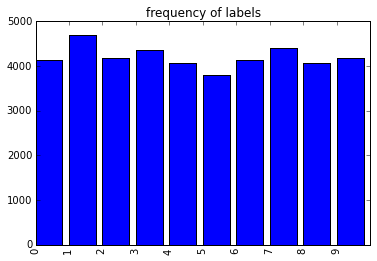

In [6]:
# x_tr_plt1=dict((x,x_tr_plt[x]) for x in x_tr_plt if x_tr_plt[x]>10)

plt.bar(range(len(y_tr_plt)), y_tr_plt.values())
plt.xticks(range(len(y_tr_plt)), y_tr_plt.keys(), rotation="vertical")
plt.title("frequency of labels")
plt.show()

This histogram tells us that other than a slightly higher frequency of "2's" being drawn there is not overwhelming difference of specific labels that may skew our model creation. So prior probability for all digits are close to even, this may affect a model for Naive bayes.

In [10]:
# Let us test out Naive Bayes right now
# use naive bayes classifier ( prior probability * probability given features)
from sklearn.naive_bayes import GaussianNB as NB

In [11]:
clf=NB()
clf.fit(x_tr,y_tr)

GaussianNB()

In [8]:
y_test=pd.read_csv(loc+"test.csv")

In [13]:
pred=clf.predict(y_test)
# pred=pred.tolist()
# pred=[int(i) for i in pred]
print pred

[0 0 9 ..., 8 9 0]


In [ ]:
# export predictions into a csv file
import csv
with open(loc+'submission.csv', 'wb') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f)
    w.writerow(["imageid", "label"])

    for i,v in enumerate(pred, start=1):
        w.writerow([i,v])


The Naive Bayes classifier produced an 0.51457 result. This is not a very good result. This may have to do with the fact that Naive bayes uses prior probability as a large part of the algorithm for prediction 

Lets try the other classifier models and see how they do.

In [9]:
# I will try to use the SGD Classifier instead as there are more than 100k datarows

from sklearn.linear_model import SGDClassifier as SGD

clf2=SGD()
clf2.fit(x_tr, y_tr)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=None, shuffle=True,
       verbose=0, warm_start=False)

In [12]:
pred2=clf2.predict(y_test)

[2 0 9 ..., 3 9 2]


In [13]:
import csv


with open(loc+'submission2.csv', 'wb') as f:  # Just use 'w' mode in 3.x
    w = csv.writer(f)
    w.writerow(["imageid", "label"])
    for i,v in enumerate(pred2, start=1):
        w.writerow([i,v])


This produces a score of 0.84829!

In [14]:
from sklearn.ensemble import RandomForestClassifier as RF
clf3=RF()
clf3.fit(x_tr, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [17]:
pred3=clf3.predict(y_test)
print pred3

[2 0 9 ..., 3 9 2]


In [19]:
with open(loc+'submission3.csv', 'wb') as f:
    w=csv.writer(f)
    w.writerow(['imageid','label'])
    for i,v in enumerate(pred4, start=1):
        w.writerow([i,v])

This produces a score of 0.941 which is only 6% off from 100%!

Since this model produces the best results I will stick with this classifier and then start working on Data Munging to possibly improve on this score

In order to clean some of the data i will change the pixel values that have counts below 25% to zero. The darkness of those pixels being so light may have to do with the fact that these pixels are associated with the beginning or end of the word since the writer will gradually press down at the start of the word and gradually lift the pen at the end of the word.


In [7]:
# Lets get the counts of the each pixel darkness value
from collections import Counter

x_tr_dk=dict(Counter(i for sublist in x_tr for i in sublist))
x_tr_dk_df=pd.DataFrame(x_tr_dk.items(), columns=['pixel_drk', 'count'])
x_tr_dk_df.describe()

,pixel_drk,count
count,256.000000,256.000000
mean,127.500000,128625.000000
std,74.045031,1664216.460833
min,0.000000,8944.000000
25%,63.750000,11962.250000
50%,127.500000,13566.000000
75%,191.250000,18366.750000
max,255.000000,26621312.000000


In [9]:
x_tr_dk_df.loc[x_tr_dk_df['count']<11962]

,pixel_drk,count
33,33,11018
52,52,10245
58,58,10089
65,65,10993
67,67,11186
68,68,11483
69,69,11762
74,74,9671
75,75,11122
77,77,9404


From the above table we can see that that 25% count is at 11962. 

In [35]:
x_tr_dk_adj={}
# make new dataframe for adjusted values
raw_train_adj=pd.DataFrame()
# create a list of all the pixel darkness values that should be turned into 0
pxdk_to_zero=[i for i in x_tr_dk if x_tr_dk[i]<11962]

# replace pixel darkness values under 25% to zero
for i in raw_train:
    raw_train_adj[i]=raw_train[i].replace(pxdk_to_zero,0, regex=True)



In [36]:
# find rows with the pixel darkness values to be replaced
pixel_check=list(set([sublist for sublist in raw_train.columns[50:150] for i in raw_train[sublist] if i in pxdk_to_zero]))
    
# Check to make sure that values below 25%of max counts are converted to zero 
print raw_train['pixel45'].value_counts()
print raw_train_adj['pixel45'].value_counts()


0      41957
71         3
254        3
218        2
114        2
24         2
255        2
253        2
27         1
234        1
64         1
160        1
130        1
132        1
228        1
69         1
230        1
94         1
231        1
74         1
202        1
12         1
186        1
44         1
142        1
174        1
62         1
180        1
117        1
22         1
246        1
221        1
217        1
26         1
145        1
Name: pixel45, dtype: int64
0      41964
71         3
254        3
218        2
114        2
24         2
255        2
253        2
26         1
202        1
64         1
160        1
130        1
132        1
228        1
230        1
62         1
231        1
234        1
217        1
12         1
44         1
145        1
221        1
22         1
246        1
27         1
142        1
Name: pixel45, dtype: int64


In [41]:
x_tr_adj=raw_train_adj.values[:,1:]

In [42]:
# Lets try random Forests now on this
from sklearn.ensemble import RandomForestClassifier as RF
clf4=RF()
clf4.fit(x_tr_adj, y_tr)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [43]:
pred4=clf4.predict(y_test)

In [49]:
import csv
with open(loc+"submission4.csv", 'wb') as f:
    w=csv.writer(f)
    w.writerow(["imageid",'label'])
    for i,v in enumerate(pred4, start=1):
        w.writerow([i,v])

Unfortunately the score was less 0.93229.

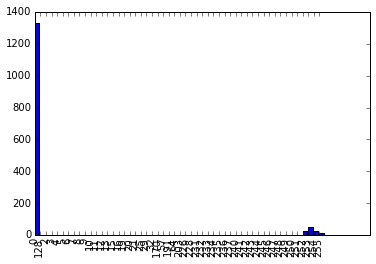

In [17]:
# create a table of the different ranges of pixel darkness values for each pixel [values 0:255]

x_tr_dk_plt=dict((x,x_tr_dk[x]/20000) for x in x_tr_dk if x_tr_dk[x]>20000)

# plot the counter
plt.bar(range(len(x_tr_dk_plt)), x_tr_dk_plt.values())
plt.xticks(range(len(x_tr_dk_plt)), x_tr_dk_plt.keys(), rotation="vertical")
plt.show()


In [ ]:
# find simple bounds for pixel darkness data used for above chart.
x_tr_dk=pd.DataFrame(x_tr_dk.items(), columns=['pixelvalue', 'count'])
x_tr_dk.describe()

In [14]:
# create a histogram of pixel location 

x_tr_col=list(raw_train.columns.values[1:])

# create a new dictionary for all values that are higher than 0
x_tr_df={}

for x in raw_train[x_tr_col]:
    sublist=[]
    for xx in raw_train[x]:
        if xx>0:
            sublist.append(xx)        
    x_tr_df[x]=sublist

In [7]:
x_tr_df1=dict((i, len(x_tr_df[i])) for i in x_tr_df if len(x_tr_df[i])>25000)
# number of values that fit condition above
len(x_tr_df1)

66

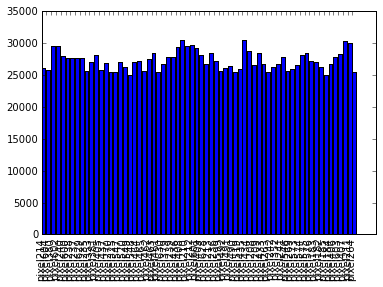

In [8]:
# create a dataframe that contains only values above 25000
# x_tr_df1=pd.DataFrame.from_dict(x_tr_df)

plt.bar(range(len(x_tr_df1)), x_tr_df1.values())
plt.xticks(range(len(x_tr_df1)), x_tr_df1.keys(), rotation="vertical")
plt.show()